In [1]:
# do this if you use a custom virtual environment to specify the directory to look for installed packages
import sys
import os
## goes back to the project directory
os.chdir("..")
# switch to the name of your virtual environment
kernel_name = ".venv_mp"
sys.path.append("\\".join([os.getcwd(), kernel_name, "Lib\\site-packages"]))

In [2]:
import pandas as pd
import os

def read_banking_data():
    directory = "//".join([os.getcwd(), "data", "bank-marketing", "bank-additional-full.csv"])
    df = pd.read_csv(directory, sep=";")

    for column in df.columns:
        column_type = str(df[column].dtype)
        if "int" not in column_type and "float" not in column_type:
            df[column] = df[column].astype("category")

    cat_columns = df.select_dtypes(['category']).columns
    df_codified = df.copy()
    df_codified[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
    
    return df, df_codified

In [3]:
from sklearn.decomposition import PCA
df, df_codified = read_banking_data()

pca = PCA(n_components=3)
reduced = pca.fit_transform(df_codified.loc[:,df_codified.columns!="y"])
df_reduced = pd.DataFrame(data = reduced, columns = ["x", "y", "z"])
df_reduced["label"] = df.y

suffled_df = df_reduced.sample(frac=1)
no_nodes = 8
sample_size =  int(df_reduced.shape[0]/no_nodes)
node_data = [suffled_df.iloc[i*sample_size:(i+1) * sample_size] for i in range(no_nodes)]

In [7]:
def pca_experiment(df):
    pca = PCA()
    pca.fit(df)
    print(pca.explained_variance_ratio_)
    print(sum(pca.explained_variance_ratio_[:3]))
    print(sum(pca.explained_variance_ratio_[:2]))

In [5]:
pca_experiment(df_codified.loc[:,df.columns!="y"])

[6.26788004e-01 3.30833615e-01 4.08471400e-02 1.01374092e-03
 1.92314271e-04 1.20238712e-04 6.96673197e-05 4.96416195e-05
 3.82617908e-05 1.80198272e-05 9.08848239e-06 7.24184225e-06
 4.84543109e-06 2.87288460e-06 1.92717561e-06 1.42287924e-06
 1.31112996e-06 2.47969899e-07 2.17159931e-07 1.81502791e-07]
0.998468759079651
0.9576216190451263


In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

def plot_per_label(df):
    fig = plt.figure(figsize=(8,8))
    ax = plt.axes(projection='3d')
    yes = df.loc[df.label == "yes"]
    no = df.loc[df.label == "no"]
    ax.scatter3D(yes.x, yes.y, yes.z, alpha=0.5)
    ax.scatter3D(no.x, no.y, no.z, alpha=0.5)
    plt.show()

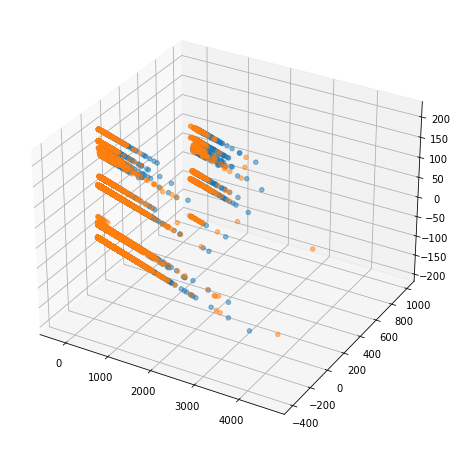

In [62]:
plot_per_label(df_reduced)

In [6]:
def plot_samples(node_data, per_label=False):
    if not per_label:
        fig = plt.figure(figsize=(8,8))
        ax = plt.axes(projection='3d')
    for df in node_data:
        if per_label:
            plot_per_label(df)
        else:
            ax.scatter3D(df.x, df.y, df.z, alpha =0.3)
    if not per_label:
        plt.show()

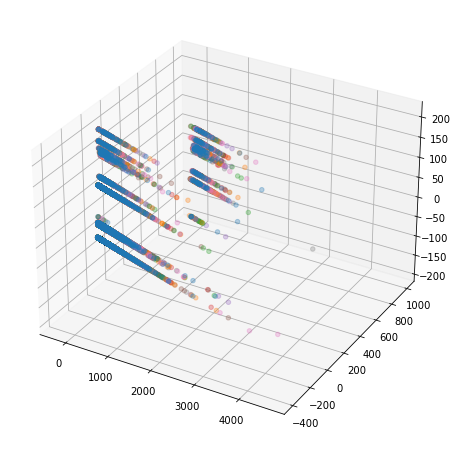

In [67]:
plot_samples(node_data)

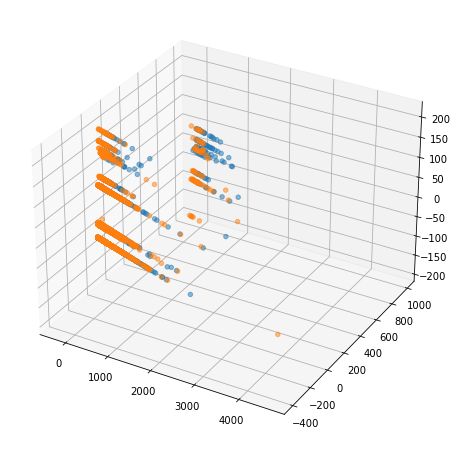

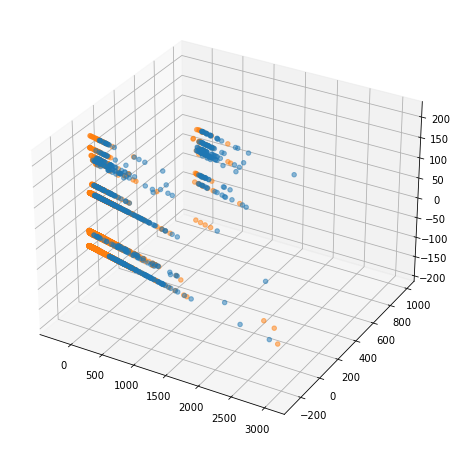

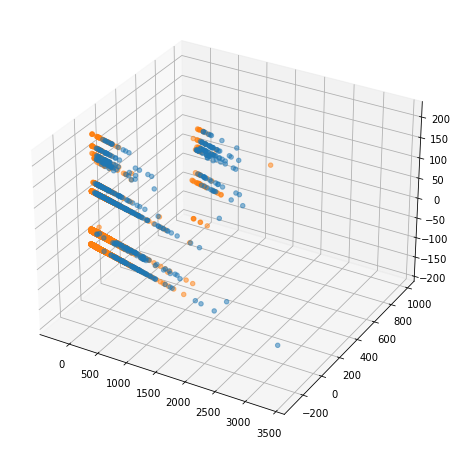

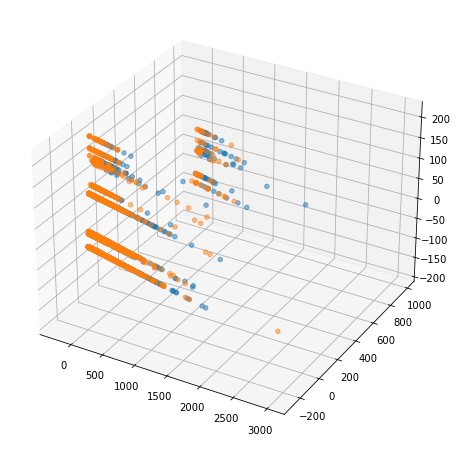

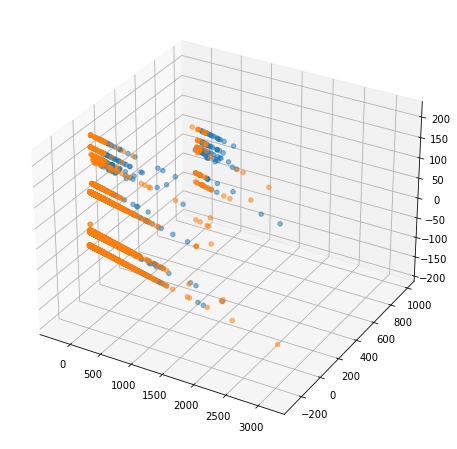

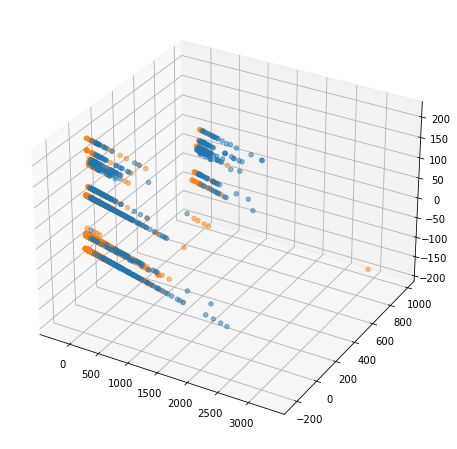

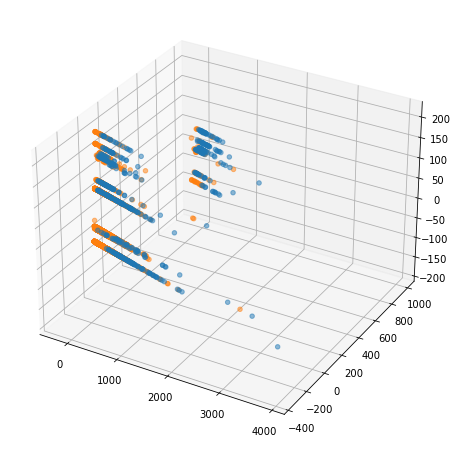

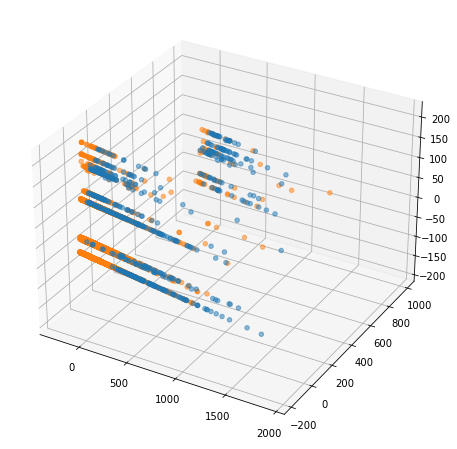

In [8]:
plot_samples(node_data, per_label=True)

In [4]:
from maximum_mean_discrepancy import avg_similarity_disimilarity_MMD as ASDMMD
from prettytable import PrettyTable

def bandwidth_experiment(samples, similar_nodes, other_nodes, bandwidths, kernel):
    print(kernel.upper(), "\n")
    t = PrettyTable(['Bandwidth', 'Similarity MMD', 'Dissimilarity MMD'])
    for bandwidth in bandwidths:
        avg_sim_mmd, avg_dis_mmd, s, d = ASDMMD(samples, similar_nodes, other_nodes, kernel, bandwidth)
        t.add_row([bandwidth, avg_sim_mmd, avg_dis_mmd])
        print(s)
        print(d)
        print()
        
    print(t)
    print()

In [5]:
from maximum_mean_discrepancy import get_tensor_samples
tensor_samples = get_tensor_samples(node_data, sample_size=sample_size)

In [16]:
import numpy as np
similar_nodes = ["pi3","pi5","pi7","pi8"]
other_nodes = ["pi2","pi4","pi6","pi9"]
bandwidth_experiment(tensor_samples, similar_nodes, other_nodes, np.linspace(0.1, 0.7, 4), "linear")

LINEAR 

+----------------+---------------------+
|     Nodes      |     Similar MMD     |
+----------------+---------------------+
| ('pi3', 'pi5') |  9.072542190551758  |
| ('pi3', 'pi7') |  1.1555531024932861 |
| ('pi3', 'pi8') |  0.9457345008850098 |
| ('pi5', 'pi7') |  13.24162483215332  |
| ('pi5', 'pi8') |   12.2736234664917  |
| ('pi7', 'pi8') |  1.1946203708648682 |
| ('pi4', 'pi3') |   2.61325740814209  |
| ('pi4', 'pi5') |  2.6015522480010986 |
| ('pi4', 'pi7') |  4.473115921020508  |
| ('pi4', 'pi8') |  3.769667148590088  |
| ('pi6', 'pi3') |  2.941138744354248  |
| ('pi6', 'pi5') |   1.95210862159729  |
| ('pi6', 'pi8') |   4.82704496383667  |
| ('pi9', 'pi3') |  1.3602631092071533 |
| ('pi9', 'pi7') |  1.6359355449676514 |
| ('pi9', 'pi8') | 0.34816789627075195 |
| ('pi4', 'pi6') |  0.5321159362792969 |
| ('pi4', 'pi9') |  2.3123292922973633 |
| ('pi6', 'pi9') |  3.602325916290283  |
+----------------+---------------------+
+----------------+--------------------+
|     No

In [18]:
bandwidth_experiment(tensor_samples, similar_nodes, other_nodes, np.linspace(1000, 10000, 5), "rbf")

RBF 

+----------------+------------------------+
|     Nodes      |      Similar MMD       |
+----------------+------------------------+
| ('pi3', 'pi5') |  0.000508040189743042  |
| ('pi3', 'pi7') | 0.0006928145885467529  |
| ('pi3', 'pi8') | 0.0005977749824523926  |
| ('pi5', 'pi7') | 0.0003534257411956787  |
| ('pi5', 'pi8') | 0.00037351250648498535 |
| ('pi7', 'pi8') | 0.0003524571657180786  |
| ('pi2', 'pi5') | 0.00047457218170166016 |
| ('pi2', 'pi7') | 0.00043445825576782227 |
| ('pi2', 'pi8') | 0.00038902461528778076 |
| ('pi4', 'pi5') | 0.0002917945384979248  |
| ('pi4', 'pi7') | 0.0003770887851715088  |
| ('pi4', 'pi8') | 0.0003011375665664673  |
| ('pi6', 'pi5') | 0.0003482028841972351  |
| ('pi6', 'pi7') | 0.00032254308462142944 |
| ('pi6', 'pi8') | 0.0003911033272743225  |
| ('pi9', 'pi5') | 0.00035503506660461426 |
| ('pi9', 'pi7') | 0.00039286911487579346 |
| ('pi2', 'pi9') |  0.000375896692276001  |
| ('pi4', 'pi6') | 0.0003197714686393738  |
+----------------+--------